# Installing the necessary libraries.

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import random
from sklearn import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
os.environ["KERAS_BACKEND"] = "tensorflow"
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Data Preprocesssing

**Let’s now add some static variables to aid us in our progress.**

In [27]:
SIZE = 256
SEED_TRAINING = 121
SEED_TESTING = 197
SEED_VALIDATION = 164
CHANNELS = 3
n_classes = 3
EPOCHS = 50
BATCH_SIZE = 16
input_shape = (SIZE, SIZE, CHANNELS)

**Splitting Dataset in Training, testing, validation**

In [3]:
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   '/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Training',
    shuffle=True,
    image_size = (SIZE,SIZE),
    batch_size = BATCH_SIZE
)

testing_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   '/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Testing',
    shuffle=True,
    image_size = (SIZE,SIZE),
    batch_size = BATCH_SIZE
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   '/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Validation',
    shuffle=True,
    image_size = (SIZE,SIZE),
    batch_size = BATCH_SIZE
)

Found 3251 files belonging to 3 classes.
Found 405 files belonging to 3 classes.
Found 416 files belonging to 3 classes.


**We have Three Classes**

In [4]:
class_names = training_dataset.class_names
class_names

['Early_Blight', 'Healthy', 'Late_Blight']

**Pitorical View of "Healthy","Late_Blight","Early_Blight"**

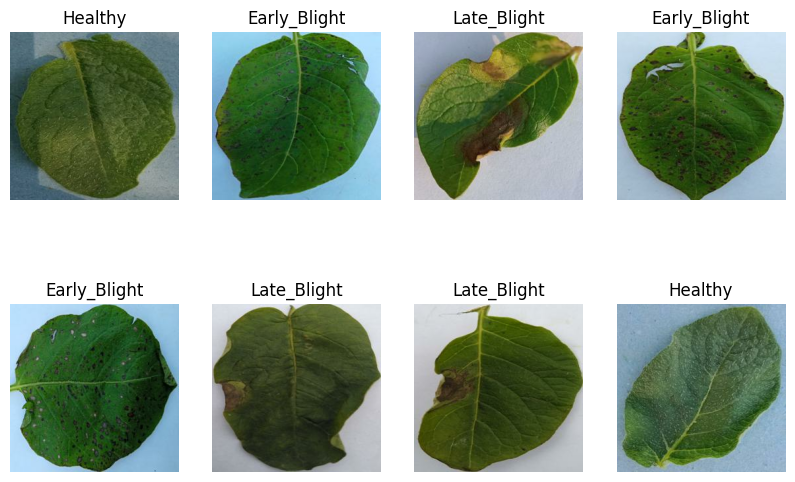

In [5]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in training_dataset.take(1):
    for i in range(0,8):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

**Shuffling Dataset**

In [7]:
train_data = training_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_data = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = testing_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [8]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the image size
IMAGE_SIZE = 256  # You can change this value according to your requirements

# Define the preprocessing pipeline
resize_scale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])


**Data Augmentation**

In [9]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])


# Model Building

**Build a classical Convolutional Neural Network Architecture.**

In [10]:
input_shape = (32, IMAGE_SIZE, IMAGE_SIZE, 3)

model = tf.keras.Sequential([
    resize_scale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(len(class_names),activation='softmax'),
])
model.build(input_shape=input_shape)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


**Let’s have a look at the brief summary of our model. We have a total of 183,747 trainable parameters. These are the weights we’ll be working with.**

In [11]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

**Compile the Potato Leaf Disease Prediction model**

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

**Train the network**

In [16]:
history=model.fit(
    train_data,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=validation_dataset
)

Epoch 1/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9773 - loss: 0.0769 - val_accuracy: 0.9784 - val_loss: 0.0615
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9820 - loss: 0.0554 - val_accuracy: 0.9832 - val_loss: 0.0501
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9886 - loss: 0.0464 - val_accuracy: 0.9856 - val_loss: 0.0413
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9811 - loss: 0.0621 - val_accuracy: 0.9615 - val_loss: 0.0904
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9825 - loss: 0.0503 - val_accuracy: 0.9736 - val_loss: 0.0663
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9825 - loss: 0.0483 - val_accuracy: 0.9760 - val_loss: 0.0870
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9854 - loss: 0.0464 - val_accuracy: 0.9808 - val_loss: 0.0467
Epoch 8/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9847 - loss: 0.0524 - val_accu

In [18]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Let’s see how well the model performs on the test data.**

In [19]:
model.evaluate(test_data)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9931 - loss: 0.0575


[0.12104722112417221, 0.9851852059364319]

**On the test set, we have a 98.51% accuracy rate, which is rather good. Let’s start with some performance graphs.**

In [21]:
history.history['accuracy']

[0.978160560131073,
 0.9772377610206604,
 0.9864656925201416,
 0.9790833592414856,
 0.9824669361114502,
 0.9836972951889038,
 0.9846200942993164,
 0.9769302010536194,
 0.9836972951889038,
 0.9833897352218628,
 0.9849277138710022,
 0.9889264702796936,
 0.9892340898513794,
 0.9775453805923462,
 0.9843125343322754,
 0.9849277138710022,
 0.9840049147605896,
 0.9833897352218628,
 0.988003671169281,
 0.983082115650177,
 0.98769611120224,
 0.9892340898513794,
 0.990156888961792,
 0.9920024871826172,
 0.9907720685005188,
 0.9836972951889038,
 0.9849277138710022,
 0.9873884916305542,
 0.988003671169281,
 0.985235333442688,
 0.9889264702796936,
 0.9849277138710022,
 0.988003671169281,
 0.990464448928833,
 0.9913872480392456,
 0.9873884916305542,
 0.9932328462600708,
 0.9858505129814148,
 0.9907720685005188,
 0.9886189103126526,
 0.9895416498184204,
 0.9873884916305542,
 0.9898492693901062,
 0.9870808720588684,
 0.9895416498184204,
 0.992617666721344,
 0.990156888961792,
 0.9907720685005188,
 0.9

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

**Let’s have a look at the history parameter.**

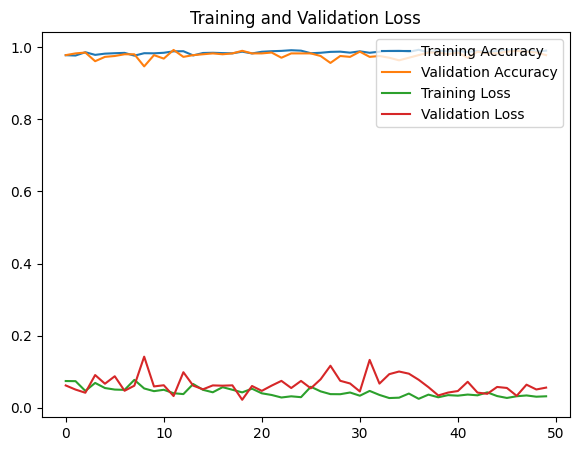

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [38]:
def predict (model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # to create a batch
    
    predictions = model.predict(img_array) # called predict functions
    
    predicted_class = class_names[np.argmax(predictions[0])] # no find the confidence
    confidence= round(100* (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


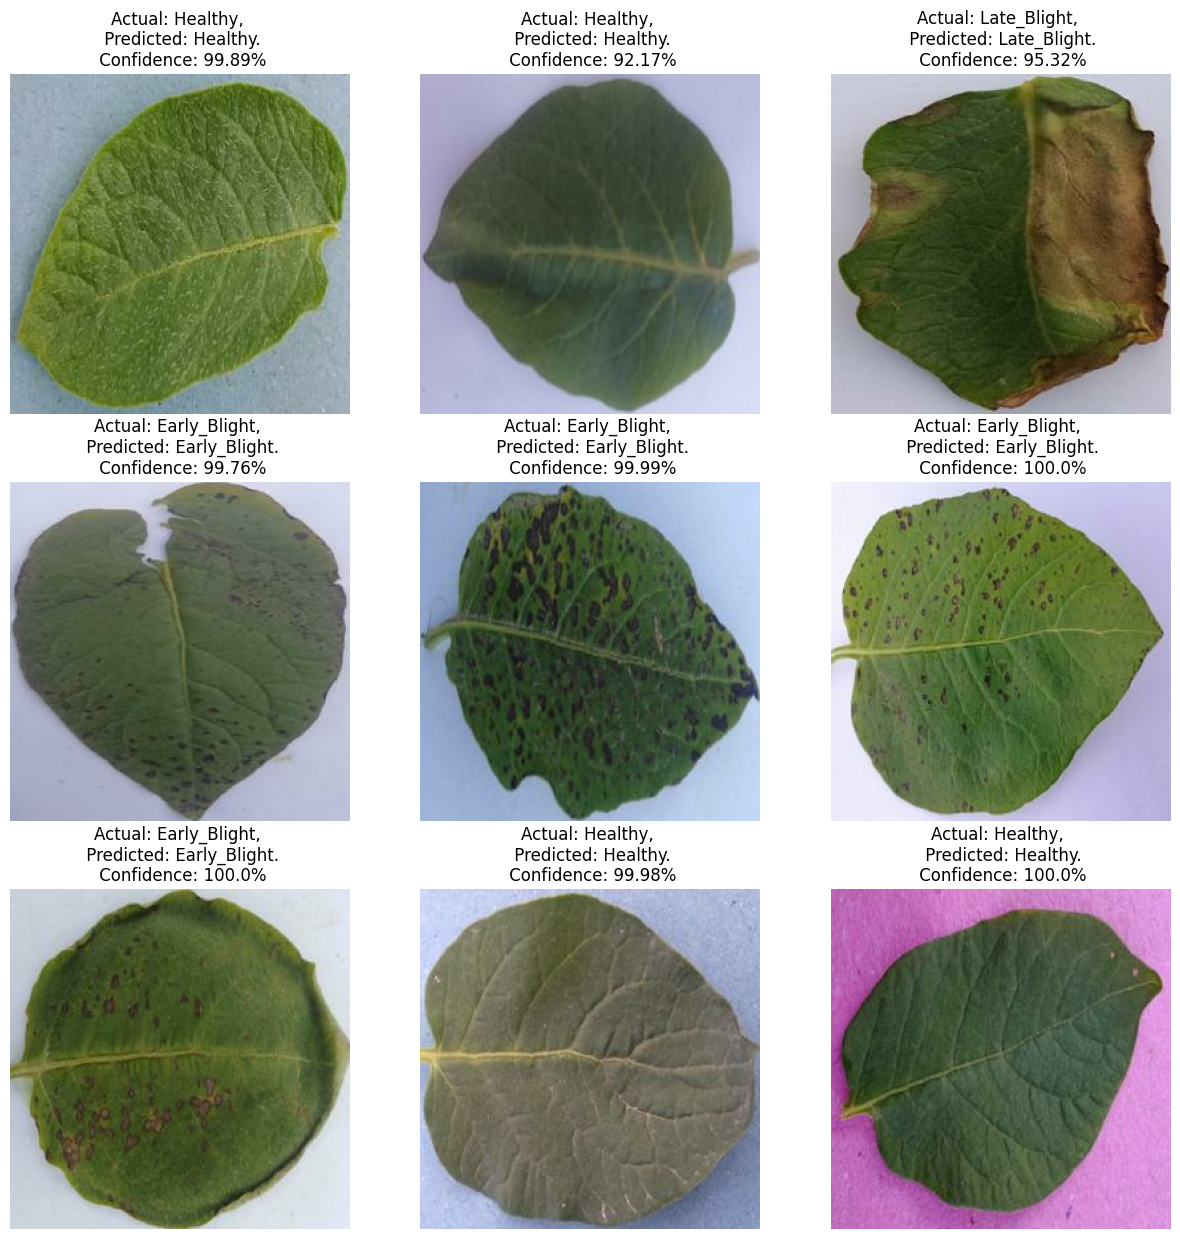

In [31]:
plt.figure(figsize=(15,15)) # increased image size, to see the images correctly

for images, labels in test_data.take(1):
    for i in range(9): # thought of ploting 12 images out of the whole batch
        ax= plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence: {confidence}%") # used python's format string, to display just the actual label
        plt.axis("off") # turn off the axis, to get rid of clusters
        

The Image Title :  Late_Blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Model Predicted label :  Late_Blight


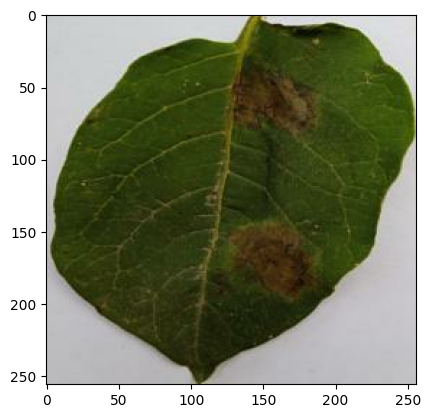

In [32]:
for image_batch,label_batch in test_data.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    print("The Image Title : ",class_names[label_batch[0].numpy()])
    prediction = model.predict(image_batch)
    print("Model Predicted label : ",class_names[np.argmax(prediction[0])])

# Saving Model
**Our model will be saved in HDF5 format since we need to save all learned parameters in deep learning, which might take up a lot of space, and HDF5 can easily hold a lot of data.**

In [34]:
model.save('my_model.keras')